In [44]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

XỬ LÝ HÌNH ẢNH ĐẦU VÀO

In [45]:
X_train = []
Y_train = []
X_test = []
Y_test = []
folder_path = 'image' 
folder_test = 'data_test'

label_file = ["alpha", "beta", "gamma", "delta", "epsilon", "zeta", "eta", "theta", "iota", "kappa", "lambda", "mu", "nu", "xi", "omicron", "pi", "rho", "sigma", "tau", "upsilon", "phi", "chi", "psi", "omega"]

def process_image(image):
    alpha = 1.7  # Điều chỉnh độ tương phản theo nhu cầu
    beta = 40 # Điều chỉnh độ sáng theo nhu cầu
    contrast_enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    kernel = np.ones((2, 2), np.uint8)
    ret, thresh_img = cv2.threshold(contrast_enhanced_image, 127, 255, cv2.THRESH_BINARY)
    dilated_img = cv2.dilate(thresh_img, kernel, iterations=1)
    height, width, channels = dilated_img.shape
    new_arr = np.mean(dilated_img, axis=2)
    return new_arr


def get_dataset(folder, X, Y):
    for label in label_file:
        for filename in os.listdir(folder + "/" + label):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                file_path = os.path.join(folder + "/" + label, filename)
                image = cv2.imread(file_path)
                processed_image = process_image(image)
                X.append(processed_image)
                Y.append(label_file.index(label))
    return X, Y

X_train, Y_train = get_dataset(folder_path, X_train, Y_train)
X_test, Y_test = get_dataset(folder_test, X_test, Y_test)

# Chuyển đổi sang numpy array
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(44043, 28, 28)
(44043,)
(2433, 28, 28)
(2433,)


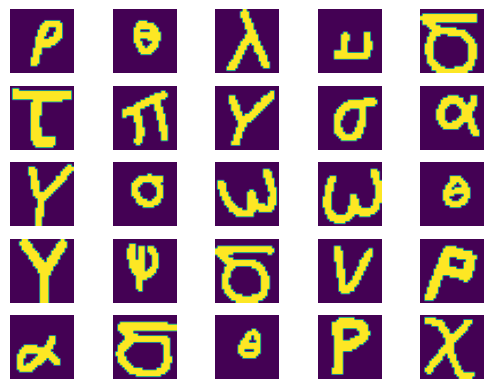

In [46]:
# Trộn dữ liệu
X_train, Y_train = shuffle(X_train, Y_train)
X_test, Y_test = shuffle(X_test, Y_test)

fig, ax = plt.subplots(5, 5)
index = 0
for i in range(5):
  for j in range(5):
    ax[i,j].imshow(X_train[index])
    ax[i,j].set_axis_off()
    index+=1
plt.show()

In [34]:
X_train = X_train.reshape((X_train.shape[0], -1)) 
X_test = X_test.reshape((X_test.shape[0], -1)) 
X_train[X_train > 0] = 1
X_test[X_test > 0] = 1


Y_train_one_hot = np.zeros((len(Y_train), 24))
for i in range(len(Y_train)):
    Y_train_one_hot[i, Y_train[i]] = 1
print(X_train.shape)
print(Y_train_one_hot.shape)
print(X_test.shape)
print(X_train[1])

(46043, 784)
(46043, 24)
(2433, 784)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1

# Hàm tanh

$\tanh(x) = \dfrac{2}{1 + e^{-2x}} - 1 = \dfrac {1 - e^{-2x}}  {1 + e^{-2x}}$

$\begin{array}l
tanh'(x) &=& -\dfrac{2 (1 + e^{-2x})'}{(1 + e^{-2x})^2}  \\
&=&  -\dfrac{-4 e^{-2x}}{(1 + e^{-2x})^2} \\
&=&  \dfrac{2e^{-2x} + e^{-4x} + 1 - e^{-4x} - 1 + 2e^{-2x}} {(1 + e^{-2x})^2} \\
&=& \dfrac {(1+e^{-2x})^2 - (1-e^{2x})^2} {(1 + e^{-2x})^2} \\
&=& 1 - \dfrac {(1-e^{2x})^2} {(1 + e^{-2x})^2} \\
&=& 1 - (\dfrac {1-e^{2x}} {1 + e^{-2x}})^2 \\
&=& 1 - tanh^2(x)
\end{array}$

# Hàm Sigmoid
$ \sigma(x) = \dfrac 1 {1+ e^{-x}} $

$\begin{array}l
\sigma'(x) &=& -\dfrac {(1+e^{-x)'}} {(1+ e^{-x})^2} \\
&=& - \dfrac {-e^{-x}} {{(1+ e^{-x})^2}} \\
&=& \dfrac {e^{-x}} {{(1+ e^{-x})^2}} \\
&=& \dfrac 1 {1+ e^{-x}} . \dfrac {e^{-x}} {1+ e^{-x}} \\
&=& \dfrac 1 {1+ e^{-x}} . \dfrac {1+e^{-x}-1} {1+ e^{-x}} \\
&=& \dfrac 1 {1+ e^{-x}} . (\dfrac {1+e^{-x}} {1+ e^{-x}} - \dfrac 1 {1+ e^{-x}}) \\ \\
&=& \sigma(x)  (1-\sigma(x))
\end{array}$


# Hàm ReLU

$ReLU(x) = max(0, x) ⇒ ReLU'(x) = \left\{\begin{matrix}
0, & \text{if} & x\leq0 \\ 1, & \text{if} & x>0 \end{matrix}\right.$

KIẾN TRÚC MẠNG

In [41]:


class NeuralNetwork:
    def __init__(self):
        self.w1 = np.random.randn(784, 256) * np.sqrt(2/784)
        self.b1 = np.zeros((1, 256))

        self.w2 = np.random.randn(256, 128) * np.sqrt(2/256)
        self.b2 = np.zeros((1, 128))

        self.w_output = np.random.randn(128, 24) * np.sqrt(2/128)  
        self.b_output = np.zeros((1, 24))

    def _tanh(self, x):
        return np.tanh(x)

    def _tanh_deriv(self, x):
        return 1 - np.tanh(x) ** 2

    def _softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def forward(self, input_data):
        self.layer1 = self._tanh(np.dot(input_data , self.w1) + self.b1)
        self.layer2 = self._tanh(np.dot(self.layer1 , self.w2) + self.b2)
        self.output = self._softmax(np.dot(self.layer2 , self.w_output) + self.b_output)
        return self.output

    def backpropagate(self, input_data, target_output, learning_rate):
        N = len(target_output)
        output_delta = (self.output - target_output) / N
        
        layer2_error = np.dot(output_delta , self.w_output.T)
        layer2_delta = layer2_error * self._tanh_deriv(self.layer2)
        layer1_error = np.dot(layer2_delta , self.w2.T)
        layer1_delta = layer1_error * self._tanh_deriv(self.layer1)

        self.w_output -= learning_rate * np.dot(self.layer2.T , output_delta)
        self.b_output -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.w2 -= learning_rate * np.dot(self.layer1.T , layer2_delta)
        self.b2 -= learning_rate * np.sum(layer2_delta, axis=0, keepdims=True)
        self.w1 -= learning_rate * np.dot(input_data.T , layer1_delta)
        self.b1 -= learning_rate * np.sum(layer1_delta, axis=0, keepdims=True)

    def train(self, input_data, target_output, test_data, test_label, learning_rate=0.001, epochs=1000):
        self.loss = []
        N = len(target_output)
        for epoch in range(epochs):
            self.output = self.forward(input_data)
            error = target_output - self.output
            loss = (error**2).sum()**0.5 / N
            self.loss.append(loss)
            self.backpropagate(input_data, target_output, learning_rate)

            output_test = self.forward(test_data)
            predictions = np.argmax(output_test, axis=1)
            accuracy = accuracy_score(test_label, predictions)
            if (epoch + 1) % 50 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


HUẤN LUYỆN MÔ HÌNH

In [42]:
model = NeuralNetwork()

model.train(X_train, Y_train_one_hot, X_test, Y_test, learning_rate=0.001, epochs=1000)

Epoch 50/1000, Loss: 0.0046, Accuracy: 0.0834
Epoch 100/1000, Loss: 0.0045, Accuracy: 0.1089
Epoch 150/1000, Loss: 0.0045, Accuracy: 0.1385
Epoch 200/1000, Loss: 0.0045, Accuracy: 0.1751
Epoch 250/1000, Loss: 0.0044, Accuracy: 0.2002
Epoch 300/1000, Loss: 0.0044, Accuracy: 0.2289
Epoch 350/1000, Loss: 0.0043, Accuracy: 0.2540
Epoch 400/1000, Loss: 0.0043, Accuracy: 0.2709
Epoch 450/1000, Loss: 0.0043, Accuracy: 0.2865
Epoch 500/1000, Loss: 0.0042, Accuracy: 0.3009
Epoch 550/1000, Loss: 0.0042, Accuracy: 0.3148
Epoch 600/1000, Loss: 0.0041, Accuracy: 0.3276
Epoch 650/1000, Loss: 0.0041, Accuracy: 0.3395
Epoch 700/1000, Loss: 0.0041, Accuracy: 0.3522
Epoch 750/1000, Loss: 0.0040, Accuracy: 0.3621
Epoch 800/1000, Loss: 0.0040, Accuracy: 0.3695
Epoch 850/1000, Loss: 0.0040, Accuracy: 0.3732
Epoch 900/1000, Loss: 0.0039, Accuracy: 0.3810
Epoch 950/1000, Loss: 0.0039, Accuracy: 0.3876
Epoch 1000/1000, Loss: 0.0039, Accuracy: 0.3950


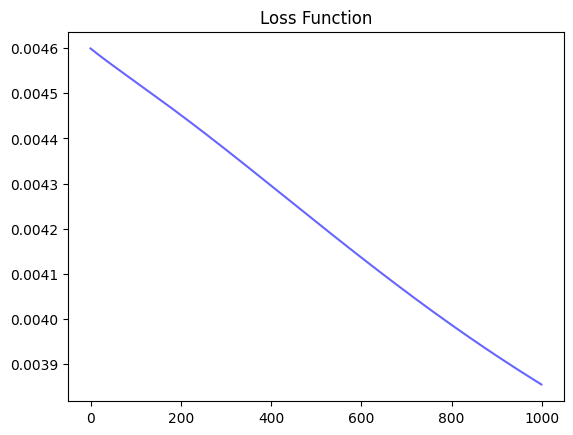

In [43]:
plt.plot(range(len(model.loss)), model.loss, color='blue', alpha=0.6)
plt.title('Loss Function')
plt.show()